In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  
password = getpass.getpass()

········


In [2]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)


In [3]:
engine = create_engine(connection_string)
query = '''select f.title, f.film_id, r.rental_date
from sakila.film as f
join sakila.inventory as i
on f.film_id = i.film_id
join sakila.rental as r
on r.inventory_id = i.inventory_id;'''
data = pd.read_sql_query(query, engine)
data.head()

,title,film_id,rental_date
0,ACADEMY DINOSAUR,1,2005-07-08 19:03:15
1,ACADEMY DINOSAUR,1,2005-08-02 20:13:10
2,ACADEMY DINOSAUR,1,2005-08-21 21:27:43
3,ACADEMY DINOSAUR,1,2022-05-16 13:37:12
4,ACADEMY DINOSAUR,1,2022-05-16 16:05:29


In [4]:
data.tail()

,title,film_id,rental_date
16041,ZORRO ARK,1000,2005-05-29 03:49:03
16042,ZORRO ARK,1000,2005-06-15 21:50:32
16043,ZORRO ARK,1000,2005-07-12 13:24:47
16044,ZORRO ARK,1000,2005-07-31 07:32:21
16045,ZORRO ARK,1000,2005-08-19 03:49:28


In [122]:
#Create a query to get the total amount of rentals in June for each film.
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''
select
    f.film_id, 
    count(p.amount) as June,
    r.rental_id,
    r.rental_date
from sakila.rental as r
join sakila.payment as p
on r.rental_id = p.rental_id
join sakila.inventory as i
on r.inventory_id = i.inventory_id
join sakila.film as f
on i.film_id = f.film_id
where r.rental_date like '2005-06%%'
group by f.film_id;
'''

June = pd.read_sql_query(query, engine)
June.head()


,film_id,June,rental_id,rental_date
0,356,4,1158,2005-06-14 22:53:33
1,961,5,1159,2005-06-14 22:55:13
2,614,4,1160,2005-06-14 23:00:34
3,369,5,1161,2005-06-14 23:07:08
4,220,4,1162,2005-06-14 23:09:38


In [97]:
def film_june()   : print("The sum of film_id is: ",June['film_id'].count())

In [98]:
film_june()

The sum of film_id is:  900


In [11]:
engine = create_engine(connection_string)
query = '''select f.film_id, p.amount, r.rental_id, r.rental_date
from sakila.rental as r
join sakila.payment as p
on r.rental_id = p.rental_id
join sakila.inventory as i
on r.inventory_id = i.inventory_id
join sakila.film as f
on i.film_id = f.film_id;'''
data = pd.read_sql_query(query, engine)
data.head()

,film_id,amount,rental_id,rental_date
0,1,0.99,4863,2005-07-08 19:03:15
1,1,3.99,11433,2005-08-02 20:13:10
2,1,3.99,14714,2005-08-21 21:27:43
3,1,1.99,972,2005-05-30 20:21:07
4,1,0.99,2117,2005-06-17 20:24:00


In [15]:
print("The sum of amount is: ",data['amount'].sum())

The sum of amount is:  67406.56000000001


In [32]:
data.groupby(['film_id', 'rental_id']).agg({'amount':sum})

amount
film_id rental_id        
1       361          0.99
        972          1.99
        1210         0.99
        2117         0.99
        3201         1.99
...                   ...
1000    12854        6.99
        12894        7.99
        13236        9.99
        14599        4.99
        15916        9.99

[16044 rows x 1 columns]

In [24]:
from datetime import datetime
from datetime import timedelta

In [27]:
data.index = pd.to_datetime(data['rental_date'],format='%m/%d/%y %I:%M%p')

In [28]:
display (data.index)

DatetimeIndex(['2005-07-08 19:03:15', '2005-08-02 20:13:10',
               '2005-08-21 21:27:43', '2005-05-30 20:21:07',
               '2005-06-17 20:24:00', '2005-07-07 10:41:31',
               '2005-07-30 22:02:34', '2005-08-23 01:01:01',
               '2005-07-31 21:36:07', '2005-08-22 23:56:37',
               ...
               '2005-07-09 14:34:09', '2005-07-29 02:23:24',
               '2005-08-18 11:22:53', '2005-08-01 10:11:25',
               '2005-08-23 17:56:01', '2005-05-29 03:49:03',
               '2005-06-15 21:50:32', '2005-07-12 13:24:47',
               '2005-07-31 07:32:21', '2005-08-19 03:49:28'],
              dtype='datetime64[ns]', name='rental_date', length=16044, freq=None)

In [131]:
# Create a query to get the total amount of rentals in June for each film.
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''
select
    f.film_id, 
    count(p.amount) as July,
    r.rental_id,
    r.rental_date
from sakila.rental as r
join sakila.payment as p
on r.rental_id = p.rental_id
join sakila.inventory as i
on r.inventory_id = i.inventory_id
join sakila.film as f
on i.film_id = f.film_id
where r.rental_date like '2005-07%%'
group by f.film_id;
'''

July = pd.read_sql_query(query, engine)
July.head()







,film_id,July,rental_id,rental_date
0,194,7,3470,2005-07-05 22:49:24
1,376,11,3471,2005-07-05 22:51:44
2,184,9,3472,2005-07-05 22:56:33
3,600,5,3473,2005-07-05 22:57:34
4,19,8,3474,2005-07-05 22:59:53


In [123]:
pd.set_option('display.max_rows', None)

In [124]:
display(July)

,film_id,July,rental_id,rental_date
0,194,7,3470,2005-07-05 22:49:24
1,376,11,3471,2005-07-05 22:51:44
2,184,9,3472,2005-07-05 22:56:33
3,600,5,3473,2005-07-05 22:57:34
4,19,8,3474,2005-07-05 22:59:53
5,473,8,3475,2005-07-05 23:01:21
6,661,6,3476,2005-07-05 23:02:37
7,934,5,3477,2005-07-05 23:05:17
8,555,7,3478,2005-07-05 23:05:44
9,492,3,3479,2005-07-05 23:08:53


In [90]:
def film_july() : print("The sum of film_id is: ",July['film_id'].count())

In [141]:
June_July = pd.merge(left = July, 
                     right = June, 
                     how = 'left',
                     left_on = "film_id" , 
                     right_on = "film_id") 
June_July.head()



,film_id,July,rental_id_x,rental_date_x,June,rental_id_y,rental_date_y
0,194,7,3470,2005-07-05 22:49:24,1.0,3457.0,2005-06-21 21:42:33
1,376,11,3471,2005-07-05 22:51:44,3.0,1846.0,2005-06-17 00:02:44
2,184,9,3472,2005-07-05 22:56:33,2.0,2065.0,2005-06-17 16:03:46
3,600,5,3473,2005-07-05 22:57:34,3.0,2637.0,2005-06-19 09:20:56
4,19,8,3474,2005-07-05 22:59:53,4.0,1735.0,2005-06-16 15:51:52


In [143]:
# 1 method
new_col = []
for i in range(len(June_July)) :
    if June_July['June'][i] < June_July['July'][i] :
        new_col.append('Yes')
    elif June_July['June'][i] >=  June_July['July'][i] :
        new_col.append('No')
    else : 
        new_col.append('Same')

In [146]:
June_July['june_or_july'] = new_col
June_July['june_or_july'].value_counts()

Yes     894
Same     58
No        6
Name: june_or_july, dtype: int64

In [163]:
June_July.head()

,film_id,July,rental_id_x,rental_date_x,June,rental_id_y,rental_date_y,june_or_july,juneorjuly
0,194,7,3470,2005-07-05 22:49:24,1.0,3457.0,2005-06-21 21:42:33,Yes,No
1,376,11,3471,2005-07-05 22:51:44,3.0,1846.0,2005-06-17 00:02:44,Yes,No
2,184,9,3472,2005-07-05 22:56:33,2.0,2065.0,2005-06-17 16:03:46,Yes,No
3,600,5,3473,2005-07-05 22:57:34,3.0,2637.0,2005-06-19 09:20:56,Yes,No
4,19,8,3474,2005-07-05 22:59:53,4.0,1735.0,2005-06-16 15:51:52,Yes,No


In [159]:

# 2 method
June_July['juneorjuly'] = June_July['June']>June_July['July']

def june_or_july(x):
    if x == True:
        x = 'Yes'
    else: x = 'No'
    return x

June_July['juneorjuly'] = June_July['juneorjuly'].apply(june_or_july)

June_July.head()

,film_id,July,rental_id_x,rental_date_x,June,rental_id_y,rental_date_y,june_or_july,juneorjuly
0,194,7,3470,2005-07-05 22:49:24,1.0,3457.0,2005-06-21 21:42:33,Yes,No
1,376,11,3471,2005-07-05 22:51:44,3.0,1846.0,2005-06-17 00:02:44,Yes,No
2,184,9,3472,2005-07-05 22:56:33,2.0,2065.0,2005-06-17 16:03:46,Yes,No
3,600,5,3473,2005-07-05 22:57:34,3.0,2637.0,2005-06-19 09:20:56,Yes,No
4,19,8,3474,2005-07-05 22:59:53,4.0,1735.0,2005-06-16 15:51:52,Yes,No


In [ ]:
#Read the data into a Pandas dataframe.

In [161]:
##Analyze extracted features and transform them. 
#You may need to encode some categorical variables or scale numerical variables.
June_July.dtypes

film_id                   int64
July                      int64
rental_id_x               int64
rental_date_x    datetime64[ns]
June                    float64
rental_id_y             float64
rental_date_y    datetime64[ns]
june_or_july             object
juneorjuly               object
dtype: object

In [162]:
June_July2= June_July.select_dtypes(include= ['object']).copy()
June_July2.head()

,june_or_july,juneorjuly
0,Yes,No
1,Yes,No
2,Yes,No
3,Yes,No
4,Yes,No


In [164]:
June_July.dtypes

film_id                   int64
July                      int64
rental_id_x               int64
rental_date_x    datetime64[ns]
June                    float64
rental_id_y             float64
rental_date_y    datetime64[ns]
june_or_july             object
juneorjuly               object
dtype: object

In [165]:
June_July['film_id'].value_counts()

194     1
573     1
745     1
90      1
896     1
798     1
949     1
979     1
976     1
727     1
977     1
760     1
770     1
364     1
183     1
276     1
457     1
937     1
406     1
970     1
344     1
810     1
435     1
100     1
792     1
316     1
873     1
794     1
305     1
608     1
903     1
266     1
161     1
349     1
666     1
296     1
725     1
694     1
142     1
262     1
186     1
462     1
921     1
122     1
865     1
89      1
209     1
544     1
604     1
952     1
968     1
597     1
193     1
647     1
610     1
953     1
522     1
167     1
535     1
431     1
705     1
306     1
537     1
253     1
886     1
889     1
224     1
579     1
125     1
765     1
613     1
353     1
272     1
112     1
175     1
405     1
864     1
538     1
811     1
715     1
56      1
517     1
586     1
740     1
482     1
660     1
933     1
439     1
484     1
944     1
256     1
504     1
458     1
68      1
358     1
215     1
547     1
821     1
543     1
51      1


In [166]:
June_July['July'].value_counts()

6     127
8     110
7     107
4     104
5      99
3      87
9      82
10     80
11     60
12     35
2      30
14     16
13     15
1       3
15      2
16      1
Name: July, dtype: int64

In [167]:
June_July['rental_id_x'].value_counts()

3470    1
4485    1
4456    1
4457    1
4460    1
4461    1
4463    1
4464    1
4467    1
4468    1
4474    1
4475    1
4479    1
4481    1
4486    1
4450    1
4488    1
4498    1
4505    1
4511    1
4512    1
4513    1
4515    1
4517    1
4525    1
4526    1
4532    1
4538    1
4454    1
4448    1
4540    1
4402    1
4368    1
4370    1
4375    1
4376    1
4377    1
4380    1
4382    1
4384    1
4385    1
4391    1
4392    1
4394    1
4403    1
4447    1
4404    1
4408    1
4410    1
4418    1
4420    1
4423    1
4425    1
4429    1
4432    1
4438    1
4439    1
4444    1
4539    1
4541    1
4365    1
4686    1
4639    1
4640    1
4651    1
4655    1
4657    1
4661    1
4665    1
4669    1
4673    1
4674    1
4677    1
4684    1
4695    1
4636    1
4698    1
4699    1
4705    1
4708    1
4710    1
4712    1
4720    1
4724    1
4733    1
4736    1
4737    1
4738    1
4638    1
4632    1
4551    1
4584    1
4553    1
4560    1
4561    1
4562    1
4564    1
4565    1
4573    1
4575    1


In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

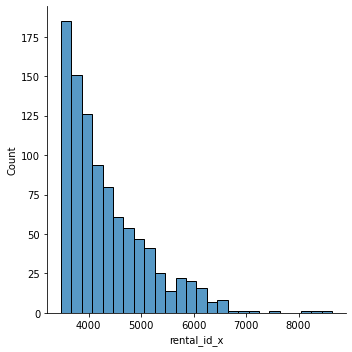

In [175]:
sns.displot(June_July['rental_id_x'])
plt.show()


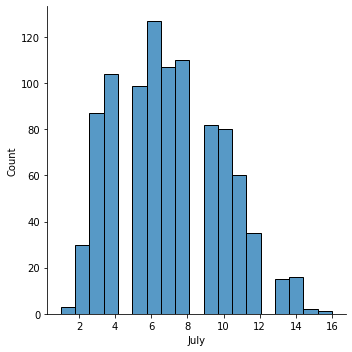

In [176]:
sns.displot(June_July['July'])
plt.show()


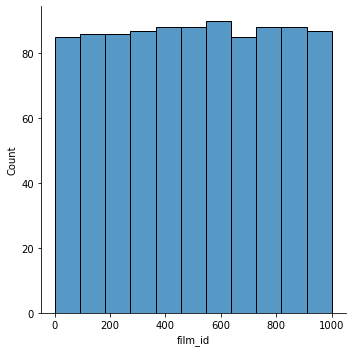

In [177]:
sns.displot(June_July['film_id'])
plt.show() 

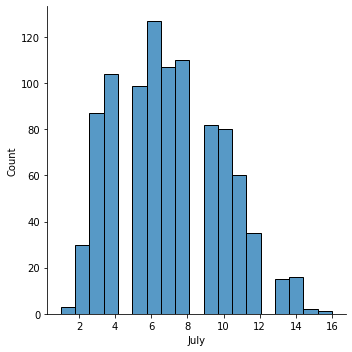

In [178]:
sns.displot(June_July['July'])
plt.show()

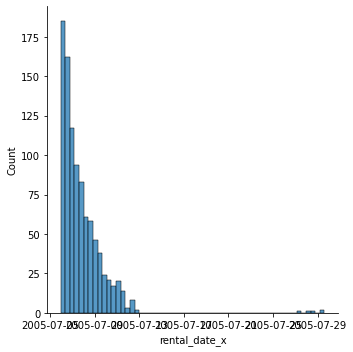

In [179]:
sns.displot(June_July['rental_date_x'])
plt.show()

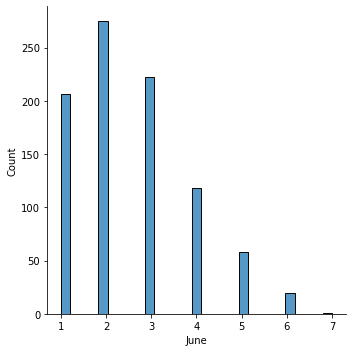

In [180]:
sns.displot(June_July['June'])
plt.show()

In [ ]:
film_id                   int64
July                      int64
rental_id_x               int64
rental_date_x    datetime64[ns]
June                    float64
rental_id_y             float64
rental_date_y    datetime64[ns]
june_or_july             object
juneorjuly               object
dtype: object

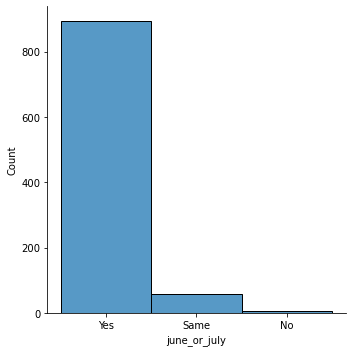

In [182]:
sns.displot(June_July['june_or_july'])
plt.show()

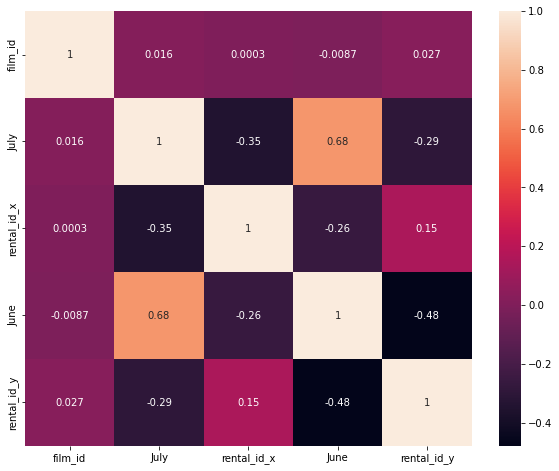

In [183]:
corr_matrix=June_July.corr()  
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [185]:
June_July.drop("juneorjuly", axis=1, inplace=True)

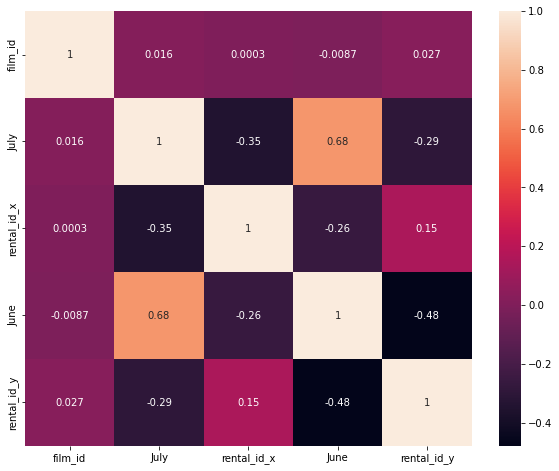

In [186]:
corr_matrix=June_July.corr()  
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [187]:
###Create a logistic regression model to predict this new column from the cleaned data.

import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_num = June_July.select_dtypes(include = np.number)
X_cat = June_July.select_dtypes(include = np.object)

# Scaling data
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
x_norm = pd.DataFrame(x_normalized)
x_norm.head()



C:\Users\NON\AppData\Local\Temp/ipykernel_5200/832431840.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_cat = June_July.select_dtypes(include = np.object)


,0,1,2,3,4
0,0.193193,0.400000,0.000000,0.000000,1.000000
1,0.375375,0.666667,0.000193,0.333333,0.299261
2,0.183183,0.533333,0.000387,0.166667,0.394519
3,0.599600,0.266667,0.000580,0.333333,0.643323
4,0.018018,0.466667,0.000774,0.500000,0.250979


In [235]:
x_norm.columns = X_num.columns
x_norm.shape

(958, 5)

In [196]:

import numpy as np

X_num = X_num.select_dtypes(include = np.number)
X_num = X_num.select_dtypes(include = np.number)
X_cat = X_cat.select_dtypes(include = np.object)
X__cat = X_cat.select_dtypes(include = np.object)

C:\Users\NON\AppData\Local\Temp/ipykernel_5200/4224496996.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_cat = X_cat.select_dtypes(include = np.object)
C:\Users\NON\AppData\Local\Temp/ipykernel_5200/4224496996.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X__cat = X_cat.select_dtypes(include = np.object)


In [242]:
X_num_transformed = np.concatenate([x_norm, x_cat], axis=1)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [197]:
X_cat

,june_or_july
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
5,Yes
6,Yes
7,Yes
8,Yes
9,Yes


In [198]:
X_num

,film_id,July,rental_id_x,June,rental_id_y
0,194,7,3470,1.0,3457.0
1,376,11,3471,3.0,1846.0
2,184,9,3472,2.0,2065.0
3,600,5,3473,3.0,2637.0
4,19,8,3474,4.0,1735.0
5,473,8,3475,2.0,2587.0
6,661,6,3476,1.0,2875.0
7,934,5,3477,1.0,1606.0
8,555,7,3478,4.0,2580.0
9,492,3,3479,2.0,1207.0


In [199]:


from sklearn.preprocessing import OneHotEncoder
encoder1 = OneHotEncoder()

encoder1.fit(X_cat)

print(encoder1.get_feature_names_out())

encoded_train = encoder1.transform(X_cat).toarray()

X_onehot_encoded_train = pd.DataFrame(encoded_train,columns=encoder1.get_feature_names_out())
X_onehot_encoded_train.head(10)

['june_or_july_No' 'june_or_july_Same' 'june_or_july_Yes']


,june_or_july_No,june_or_july_Same,june_or_july_Yes
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.0,0.0,1.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,0.0,1.0


In [201]:
from sklearn.preprocessing import OneHotEncoder
encoder2 = OneHotEncoder()

encoder2.fit(X_cat)

print(encoder2.get_feature_names_out())

encoded_train2 = encoder2.transform(X_cat).toarray()

y_onehot_encoded_train = pd.DataFrame(encoded_train2,columns=encoder2.get_feature_names_out())
y_onehot_encoded_train.head(10)

['june_or_july_No' 'june_or_july_Same' 'june_or_july_Yes']


,june_or_july_No,june_or_july_Same,june_or_july_Yes
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.0,0.0,1.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,0.0,1.0


In [226]:
y_onehot_encoded_train= np.concatenate([y_onehot_encoded_train, X_cat], axis=1)
y_onehot_encoded_train

array([[0.0, 0.0, 1.0, 'Yes', 'Yes'],
       [0.0, 0.0, 1.0, 'Yes', 'Yes'],
       [0.0, 0.0, 1.0, 'Yes', 'Yes'],
       ...,
       [0.0, 1.0, 0.0, 'Same', 'Same'],
       [0.0, 1.0, 0.0, 'Same', 'Same'],
       [0.0, 1.0, 0.0, 'Same', 'Same']], dtype=object)

In [253]:
classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial').fit(encoded_train2, x_cat)

In [254]:
predictions = classification.predict(encoded_train2)
classification.score(encoded_train2, x_cat)

1.0

In [255]:
print(x_cat.value_counts())

1.0    894
0.0     64
Name: june_or_july_Yes, dtype: int64


In [256]:
pd.Series(predictions).value_counts()

1.0    894
0.0     64
dtype: int64

In [257]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score

In [258]:
#evaluate the results.

from sklearn.metrics import confusion_matrix
confusion_matrix(x_cat, predictions)

array([[ 64,   0],
       [  0, 894]], dtype=int64)

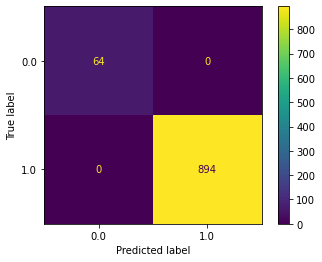

In [259]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_test = confusion_matrix(x_cat, predictions)

disp = ConfusionMatrixDisplay(cm_test, display_labels = classification.classes_)
disp.plot()
plt.show()